**1. Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Load the Dataset**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", error_bad_lines = False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df['Month']

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

**3. Data preprocessing**

In [6]:
df['Month'].size

144

In [7]:
type(df['Month'])

pandas.core.series.Series

In [8]:
# Converting 'Month' column to datetime type
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df['Month']

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
type(df['Month'])

pandas.core.series.Series

In [12]:
# Set entries of month cloumn as index of the DataFrame 
df.set_index("Month", inplace = True)

In [13]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [14]:
df['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [15]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

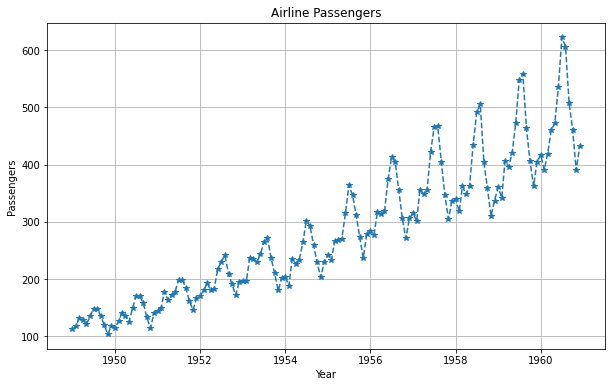

In [16]:
# Plotting the number of Passengers for every month of the year
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.Passengers, '--', marker = "*", )
plt.grid()
plt.title("Airline Passengers")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

3.1 Handling the Missing Values

In [17]:
# Check for the missing values
df.isnull()

,Passengers
Month,
1949-01-01,False
1949-02-01,False
1949-03-01,False
1949-04-01,False
1949-05-01,False
...,...
1960-08-01,False
1960-09-01,False
1960-10-01,False


In [18]:
df.isnull().sum()

Passengers    0
dtype: int64

In [19]:
df.isnull().any()

Passengers    False
dtype: bool

In [20]:
df.isnull().all()

Passengers    False
dtype: bool

In [21]:
# In case of presence of missing values, we shall handle it by

# Make copy of our dataset and make some nulls
df_copy = df.copy()

In [22]:
df_copy

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [23]:
# Fraction out 10% of DataFrame and store in rows
rows = df_copy.sample(frac = 0.1, random_state = 0)

In [24]:
rows

,Passengers
Month,
1949-08-01,148
1956-06-01,374
1957-02-01,301
1951-03-01,178
1958-03-01,362
1959-09-01,463
1953-12-01,201
1950-11-01,114
1959-10-01,407


In [25]:
rows.size

14

In [26]:
rows['Passengers']

Month
1949-08-01    148
1956-06-01    374
1957-02-01    301
1951-03-01    178
1958-03-01    362
1959-09-01    463
1953-12-01    201
1950-11-01    114
1959-10-01    407
1950-05-01    125
1959-07-01    548
1959-01-01    360
1952-05-01    183
1952-10-01    191
Name: Passengers, dtype: int64

In [27]:
# Set sampled out values to NULL
rows['Passengers'] = np.nan

In [28]:
rows['Passengers']

Month
1949-08-01   NaN
1956-06-01   NaN
1957-02-01   NaN
1951-03-01   NaN
1958-03-01   NaN
1959-09-01   NaN
1953-12-01   NaN
1950-11-01   NaN
1959-10-01   NaN
1950-05-01   NaN
1959-07-01   NaN
1959-01-01   NaN
1952-05-01   NaN
1952-10-01   NaN
Name: Passengers, dtype: float64

In [29]:
rows.index

DatetimeIndex(['1949-08-01', '1956-06-01', '1957-02-01', '1951-03-01',
               '1958-03-01', '1959-09-01', '1953-12-01', '1950-11-01',
               '1959-10-01', '1950-05-01', '1959-07-01', '1959-01-01',
               '1952-05-01', '1952-10-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [30]:
# replace those values in df_copy
df_copy.loc[rows.index, "Passengers"] = rows['Passengers']

In [31]:
df_copy

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [32]:
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [33]:
# Fill the NULL values: Imputation - Forward Fill
df_copy_ffill = df_copy.fillna(method = 'ffill')

In [34]:
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [35]:
# Fill the NULL values: Imputation - Backward Fill
df_copy_bfill = df_copy.fillna(method = 'bfill')

In [36]:
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [37]:
# Fill the NULL values: Interpolation - Forward Fill
df_copy_LIF = df_copy.interpolate(method = "linear", limit_direction='forward')

In [38]:
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [39]:
# Fill the NULL values: Interpolation - Backward Fill
df_copy_LIB = df_copy.interpolate(method = "linear", limit_direction='backward')

In [40]:
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

In [41]:
# Resampling
# Fill the NULL values: Downsample to quaterly data points (3 Months)
df_quaterly = df.resample('3M').mean()

In [42]:
df_quaterly

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333
1950-04-30,134.000000
1950-07-31,148.000000
1950-10-31,153.666667
1951-01-31,133.000000


In [43]:
df_quaterly.size

49

In [44]:
df_quaterly.isnull().any()

Passengers    False
dtype: bool

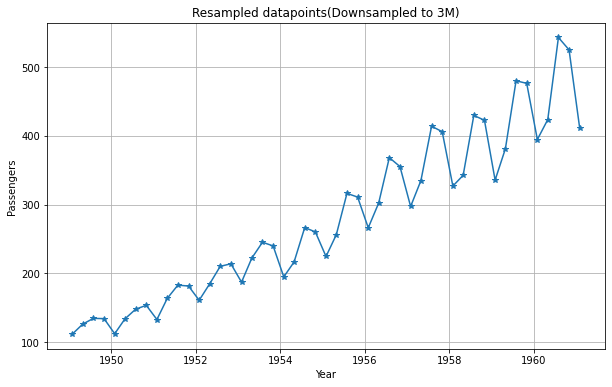

In [45]:
plt.figure(figsize = (10, 6))
plt.plot(df_quaterly.index, df_quaterly.Passengers, '-', marker='*')
plt.grid()
plt.xlabel('Year')
plt.title("Resampled datapoints(Downsampled to 3M)")
plt.ylabel('Passengers')
plt.show()

In [46]:
# Fill the NULL values: Upsample to daily data points (day wise)
df_daily = df.resample('D').mean()

In [47]:
df_daily

,Passengers
Month,
1949-01-01,112.0
1949-01-02,NaN
1949-01-03,NaN
1949-01-04,NaN
1949-01-05,NaN
...,...
1960-11-27,NaN
1960-11-28,NaN
1960-11-29,NaN


In [48]:
df_daily.size

4353

In [49]:
df_daily.isnull().sum()

Passengers    4209
dtype: int64

In [50]:
# Non-null values
df_daily.size - df_daily.isna().sum()

Passengers    144
dtype: int64

In [51]:
df_daily.Passengers[df_daily.Passengers.isnull()==False]

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Name: Passengers, Length: 144, dtype: float64

In [52]:
df_daily.Passengers[df_daily.Passengers.isnull()==False].shape

(144,)

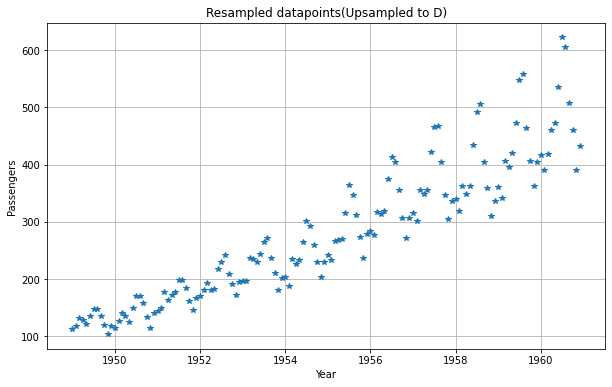

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily.Passengers, '--', marker='*')
plt.title("Resampled datapoints(Upsampled to D)")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.show()

In [54]:
# Fill the NULL values: Moving Average Smoothing (Window slides 12 times)
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

In [55]:
MA

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: Passengers, Length: 144, dtype: float64

In [56]:
MA.loc['1949-11-01']

nan

In [57]:
# Mean starts from month 12(Dec), as window size is 12
MA.loc['1949-12-01']

126.66666666666667

In [58]:
MA.isna().sum()

11

In [59]:
MA.size

144

In [60]:
# Window size is 12 months, with 11 NULLs
(144-11)/12

11.083333333333334

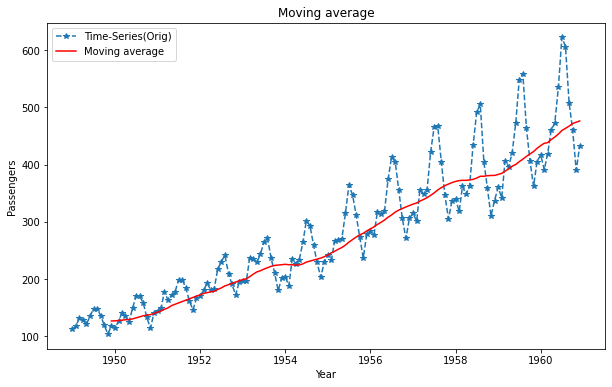

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.Passengers, '--', marker='*', label = 'Time-Series(Orig)')
plt.plot(MA.index, MA, '-', color='red', label = 'Moving average')
plt.title("Moving average")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc="best")
plt.show()

**3.2** Time Series **E**xploratory **D**ata **A**nalysis

In [62]:
import statsmodels.api as sm
from pylab import rcParams

In [63]:
# Statsmodels' API provides a comprehensive set of classes and functions that allow users to easily access and manipulate data,
# as well as build statistical models. It also includes a variety of visualization tools, including time series plots, boxplots, and scatterplots.

In [64]:
# seasonal_decompose decomposes a time series into trend, seasonality and noise in one line of code.

In [65]:
# Additive

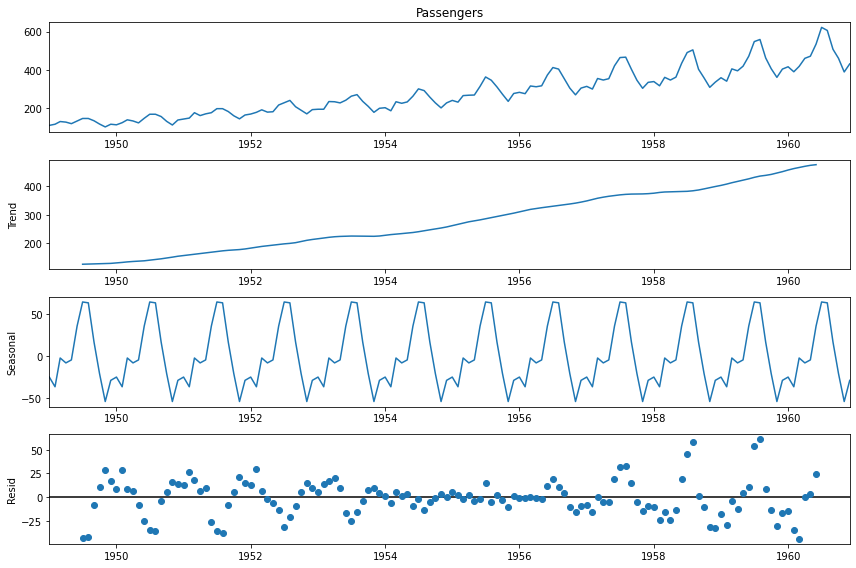

In [66]:
rcParams['figure.figsize'] = 12, 8
# A object with seasonal, trend, and resid attributes
# Y[t] = T[t] + S[t] + e[t]
decompose_series = sm.tsa.seasonal_decompose(df['Passengers'], model = 'additive')
decompose_series.plot()
plt.show()

In [67]:
decompose_series

In [68]:
type(decompose_series)

statsmodels.tsa.seasonal.DecomposeResult

In [69]:
decompose_series.resid.isnull().sum()

12

In [70]:
decompose_series.resid[decompose_series.resid.isnull()==False]

Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
                ...    
1960-02-01   -34.186869
1960-03-01   -43.967172
1960-04-01    -0.296717
1960-05-01     3.756313
1960-06-01    24.555556
Name: resid, Length: 132, dtype: float64

In [71]:
decompose_series.seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [72]:
decompose_series.seasonal.isna().sum()

0

In [73]:
decompose_series.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [74]:
decompose_series.trend.isna().sum()

12

In [75]:
# Multiplicative

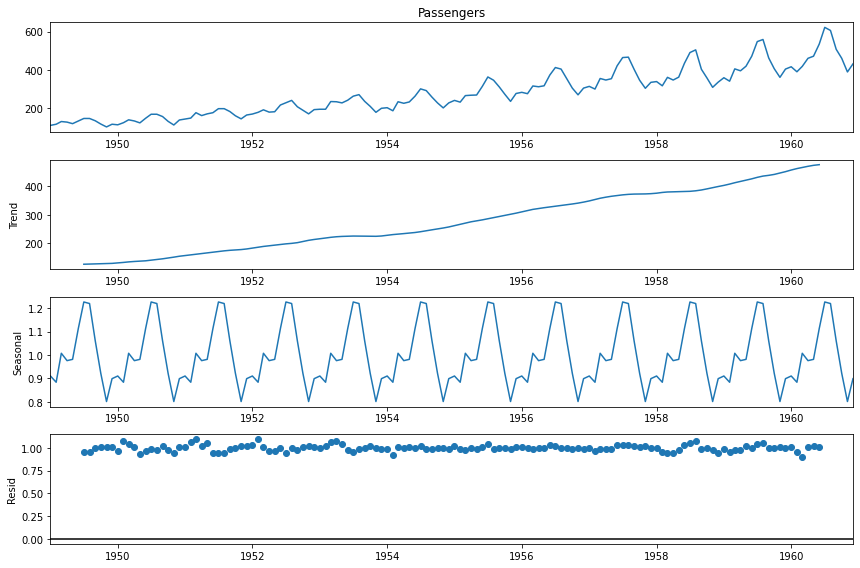

In [76]:
rcParams['figure.figsize'] = 12, 8
# A object with seasonal, trend, and resid attributes
# Y[t] = T[t] * S[t] * e[t]
decompose_series1 = sm.tsa.seasonal_decompose(df['Passengers'], model = 'multiplicative')
decompose_series1.plot()
plt.show()

In [77]:
decompose_series1.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [78]:
decompose_series1.trend.isnull().sum()

12

In [79]:
decompose_series1.trend[decompose_series1.trend.isnull()==False]

Month
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
                 ...    
1960-02-01    461.375000
1960-03-01    465.208333
1960-04-01    469.333333
1960-05-01    472.750000
1960-06-01    475.041667
Name: trend, Length: 132, dtype: float64

In [80]:
# This is because trend won't come into picture at the start and end of period
decompose_series1.trend[decompose_series1.trend.isnull()==True]

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
1949-06-01   NaN
1960-07-01   NaN
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, dtype: float64

In [81]:
decompose_series1.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [82]:
decompose_series1.seasonal.isnull().sum()

0

In [83]:
decompose_series1.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

In [84]:
decompose_series1.resid.isnull().sum()

12

In [85]:
decompose_series1.resid[decompose_series1.resid.isnull()==False]

Month
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
                ...   
1960-02-01    0.959079
1960-03-01    0.894086
1960-04-01    1.006495
1960-05-01    1.017359
1960-06-01    1.012079
Name: resid, Length: 132, dtype: float64

In [86]:
# The decomposed time series show an obvious increasing trend and seasonality variations. We have initially plotted the moving average
# over the last 12 months which showed that it varies with time. This suggests that the data is not 'Stationary'.
# We will now perform 'ADF test' to confirm this speculation

In [87]:
from statsmodels.tsa.stattools import adfuller
adf_res = adfuller(df['Passengers'])
# adfuller: Augmented Dickey-Fuller test used for unit root in univariate process in process of serial correlation

In [88]:
# The adfuller function returns a tuple of statistics from the ADF test such as the Test Statistic, P-Value, Number of Lags Used, 
# Number of Observations used for the ADF regression
adf_res

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [89]:
adf_res[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [90]:
print(f'ADF Statistic: {adf_res[0]}')
print(f'p-value: {adf_res[1]}')
print(f'No. of lags used: {adf_res[2]}')
print(f'No. of observations used: {adf_res[3]}')
print('Critical Values at each significance level:')
for k, v in adf_res[4].items():
  print(f'  {k}: {v}')
print(f'icbest-maximized information criterion: {adf_res[5]}')

ADF Statistic: 0.8153688792060472
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used: 130
Critical Values at each significance level:
  1%: -3.4816817173418295
  5%: -2.8840418343195267
  10%: -2.578770059171598
icbest-maximized information criterion: 996.6929308390189


In [91]:
# from the results obtained, the p-value is greater than the critial value at a 5% significance level 
# ADF statistic is greater than any of critical values obtained
# This confirms that series is indeed 'non-stationary'

**3.3** Convert time series into stationary by removing trend and seasonality

In [92]:
# Transformation and Differencing

# Transformation
df_log = np.log(df)

In [93]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [94]:
df_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [95]:
# Differencing
df_diff = df_log.diff(periods = 1)

In [96]:
# Calculating the difference from its previous value, periods=1 (default) is the difference from its previous value
df_diff

,Passengers
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [97]:
df_diff.rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [98]:
df_diff.rolling(12).mean()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.006728
1960-09-01,0.007730
1960-10-01,0.010382


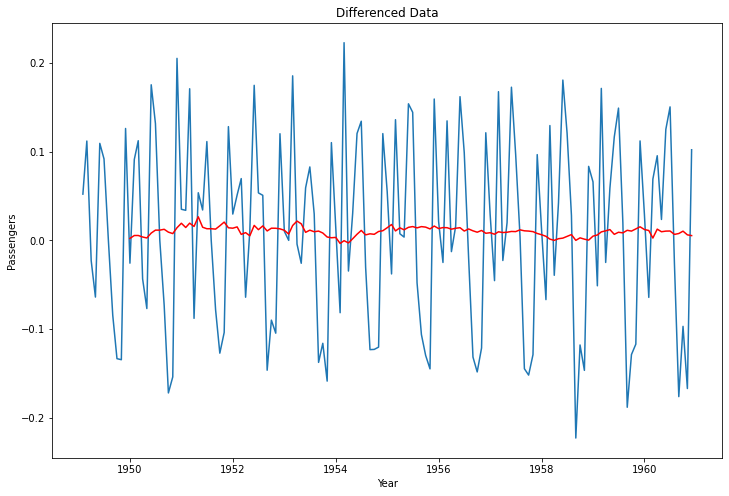

In [99]:
plt.figure(figsize=(12, 8))
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.title("Differenced Data")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.plot(df_diff.rolling(12).mean(), color='red')
plt.show()

In [100]:
# df_diff.rolling(12).mean() gives the dataframe that is 'stationary'

**4. Time Series Forecasting using Stochastic Models**

In [101]:
# importing Auto Correlation and Partial Auto Correlation Functions
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [102]:
type(df_diff)

pandas.core.frame.DataFrame

In [103]:
df_diff['Passengers']

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: Passengers, Length: 144, dtype: float64

In [104]:
df_diff.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [105]:
type(df_diff['Passengers'])

pandas.core.series.Series

In [106]:
df_diff.isna().sum()

Passengers    1
dtype: int64

In [107]:
df_diff.dropna(inplace=True)

In [108]:
df_diff.isna().sum()

Passengers    0
dtype: int64

<Figure size 864x576 with 0 Axes>

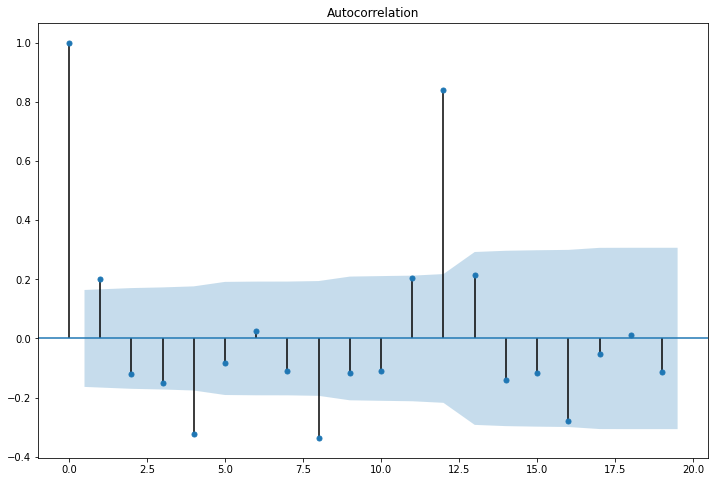

<Figure size 864x576 with 0 Axes>

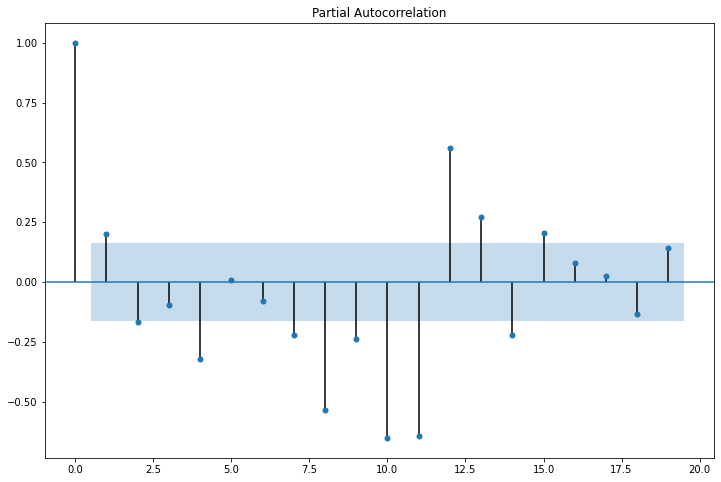

In [109]:
# ACF
plt.figure(figsize=(12, 8))
plot_acf(df_diff['Passengers'], lags = range(0, 20))
plt.show()

# PACF
plt.figure(figsize=(12, 8))
plot_pacf(df_diff['Passengers'], lags = range(0, 20))
plt.show()

In [110]:
# The shaded regions in the plots are the confidence intervals. The lags where the PACF
# and ACF charts cross this region are the values for p and q respectively. In both plots, 
# p=q=1. 

In [111]:
# The shaded regions in the plots are the confidence intervals. The lags where the PACF and
# ACF charts cross this region are the values for p and q respectively.
# In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly
# in the PACF plot, p=2 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

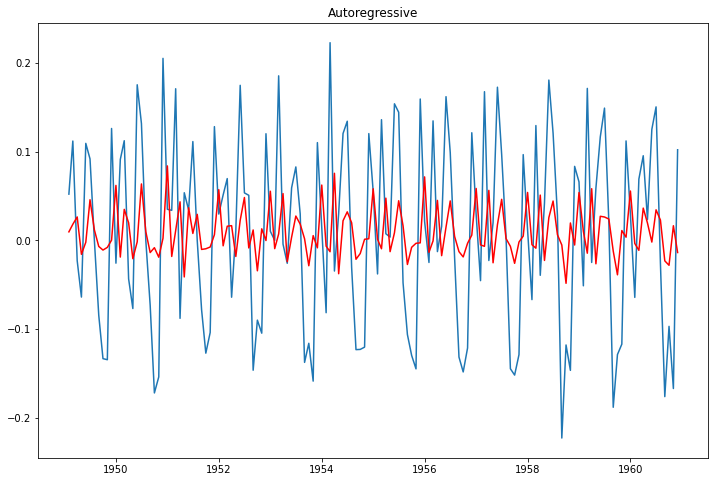

In [112]:
# Auto Regressive, Moving Average, ARIMA(p, d, q)
from statsmodels.tsa.arima_model import ARIMA

# Auto Regressive
AR_model = ARIMA(df_diff, order=(2, 0, 0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.title("Autoregressive")
plt.plot(AR_model_results.fittedvalues, color = 'red')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


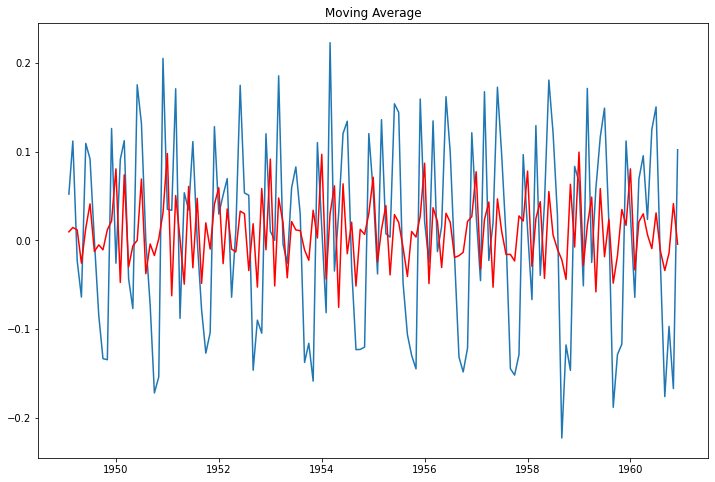

In [113]:
# Moving Average
MA_model = ARIMA(df_diff, order = (0, 0, 2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.title("Moving Average")
plt.plot(MA_model_results.fittedvalues, color='red')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


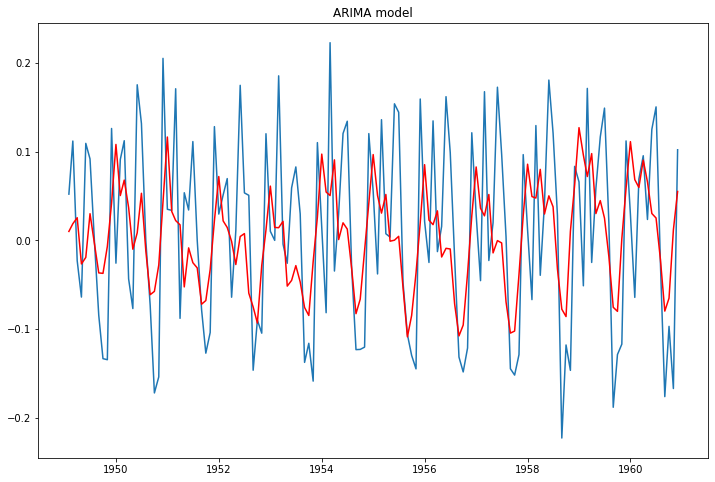

In [114]:
# ARIMA model
ARIMA_model = ARIMA(df_diff, order=(2, 0, 1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.title("ARIMA model")
plt.plot(ARIMA_results.fittedvalues, color="red")

In [115]:
ARIMA_model

In [116]:
ARIMA_results

In [117]:
ARIMA_results.fittedvalues

Month
1949-02-01    0.010077
1949-03-01    0.018748
1949-04-01    0.025573
1949-05-01   -0.026632
1949-06-01   -0.019252
                ...   
1960-08-01   -0.021751
1960-09-01   -0.079861
1960-10-01   -0.065283
1960-11-01    0.011788
1960-12-01    0.055156
Length: 143, dtype: float64

In [118]:
ARIMA_results.fittedvalues.isna().sum()

0

In [119]:
df_diff

,Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [120]:
df_diff.isna().sum()

Passengers    0
dtype: int64

# Facebook Prophet

**5. Univariate time series forecasting using Facebook Prophet**

In [121]:
'''
 Prophet forecasts data by using either of the 2 models:
1. Logistic growth for non-linear data
2. Piecewise linear model for data with linear properties but selects the latter by default

y(t) = g(t) + s(t) + h(t) + ϵt
While 
y(t) is the forecast,
g(t)is the piecewise linear or logistic growth curve trend that models 'non-periodic' changes in time series,
s(t) represents the seasonality in the series for periodic changes,
h(t) allows for irregularities by factoring in the effects of specified holidays,
𝝐t is the error term in the model for unusual changes
'''

"\n Prophet forecasts data by using either of the 2 models:\n1. Logistic growth for non-linear data\n2. Piecewise linear model for data with linear properties but selects the latter by default\n\ny(t) = g(t) + s(t) + h(t) + ϵt\nWhile \ny(t) is the forecast,\ng(t)is the piecewise linear or logistic growth curve trend that models 'non-periodic' changes in time series,\ns(t) represents the seasonality in the series for periodic changes,\nh(t) allows for irregularities by factoring in the effects of specified holidays,\n𝝐t is the error term in the model for unusual changes\n"

In [182]:
# Forecast time series
from fbprophet import Prophet

In [127]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536145 sha256=b1eb7ffd1d362c92b0331abb6f23bc9a2cb335ea3c30af2338b67afab1ef587b
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet


In [183]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv", error_bad_lines = False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [184]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [185]:
df['Month']

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
        ...   
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, Length: 144, dtype: object

In [186]:
type(df['Month'])

pandas.core.series.Series

In [187]:
df['Month'] = pd.to_datetime(df['Month'])

In [188]:
type(df['Month'])

pandas.core.series.Series

In [189]:
# DataFrame containing 2 columns: datestamp(ds), y(numeric we wish to forecast) are the 2 columns to be passed to prophet to fit, predict
df = df.rename(columns = {"Month": "ds", "Passengers": "y"})

In [190]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [191]:
model = Prophet()

In [192]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [193]:
# predict for next 10 months
# suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe based on frequency
# Montly(M), Daily(D), Yearly(Y), number of periods to forecast
future = model.make_future_dataframe(periods = 10, freq = 'M')

In [194]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
149,1961-05-31
150,1961-06-30
151,1961-07-31
152,1961-08-31


In [195]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [196]:
future.tail()

,ds
149,1961-05-31
150,1961-06-30
151,1961-07-31
152,1961-08-31
153,1961-09-30


In [197]:
forecast = model.predict(future)

In [198]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.763021,54.918058,111.373894,106.763021,106.763021,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,0.0,0.0,0.0,84.827140
1,1949-02-01,108.935527,48.928220,110.486008,108.935527,108.935527,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,0.0,0.0,0.0,78.245570
2,1949-03-01,110.897791,81.821698,140.099520,110.897791,110.897791,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,0.0,0.0,0.0,110.395070
3,1949-04-01,113.070297,78.317093,135.951131,113.070297,113.070297,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,0.0,0.0,0.0,107.893153
4,1949-05-01,115.172723,82.549832,140.473453,115.172723,115.172723,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,0.0,0.0,0.0,111.401366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1961-05-31,502.601908,505.841768,562.364950,502.439286,502.780908,31.452771,31.452771,31.452771,31.452771,31.452771,31.452771,0.0,0.0,0.0,534.054679
150,1961-06-30,505.616057,547.495202,604.495473,505.405424,505.848496,71.499823,71.499823,71.499823,71.499823,71.499823,71.499823,0.0,0.0,0.0,577.115880
151,1961-07-31,508.730677,547.275629,603.898852,508.467244,509.026207,66.813402,66.813402,66.813402,66.813402,66.813402,66.813402,0.0,0.0,0.0,575.544079
152,1961-08-31,511.845297,498.593320,558.273098,511.522379,512.223552,17.268505,17.268505,17.268505,17.268505,17.268505,17.268505,0.0,0.0,0.0,529.113801


In [199]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
144,1960-12-31,487.430695,434.484201,490.275310,487.430695,487.430695,-25.420596,-25.420596,-25.420596,-25.420596,-25.420596,-25.420596,0.0,0.0,0.0,462.010099
145,1961-01-31,490.545315,428.623634,483.278458,490.533000,490.556501,-35.842074,-35.842074,-35.842074,-35.842074,-35.842074,-35.842074,0.0,0.0,0.0,454.703240
146,1961-02-28,493.358520,468.508939,525.638217,493.320737,493.394196,4.425488,4.425488,4.425488,4.425488,4.425488,4.425488,0.0,0.0,0.0,497.784008
147,1961-03-31,496.473140,458.367623,517.255264,496.399837,496.546800,-8.746089,-8.746089,-8.746089,-8.746089,-8.746089,-8.746089,0.0,0.0,0.0,487.727051
148,1961-04-30,499.487288,467.449059,527.909317,499.372086,499.601109,-1.078737,-1.078737,-1.078737,-1.078737,-1.078737,-1.078737,0.0,0.0,0.0,498.408551
149,1961-05-31,502.601908,505.841768,562.364950,502.439286,502.780908,31.452771,31.452771,31.452771,31.452771,31.452771,31.452771,0.0,0.0,0.0,534.054679
150,1961-06-30,505.616057,547.495202,604.495473,505.405424,505.848496,71.499823,71.499823,71.499823,71.499823,71.499823,71.499823,0.0,0.0,0.0,577.115880
151,1961-07-31,508.730677,547.275629,603.898852,508.467244,509.026207,66.813402,66.813402,66.813402,66.813402,66.813402,66.813402,0.0,0.0,0.0,575.544079
152,1961-08-31,511.845297,498.593320,558.273098,511.522379,512.223552,17.268505,17.268505,17.268505,17.268505,17.268505,17.268505,0.0,0.0,0.0,529.113801
153,1961-09-30,514.859445,464.101768,523.105070,514.480418,515.289250,-22.514494,-22.514494,-22.514494,-22.514494,-22.514494,-22.514494,0.0,0.0,0.0,492.344951


In [200]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [201]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.827140,54.918058,111.373894,106.763021,106.763021,106.763021
1,1949-02-01,78.245570,48.928220,110.486008,108.935527,108.935527,108.935527
2,1949-03-01,110.395070,81.821698,140.099520,110.897791,110.897791,110.897791
3,1949-04-01,107.893153,78.317093,135.951131,113.070297,113.070297,113.070297
4,1949-05-01,111.401366,82.549832,140.473453,115.172723,115.172723,115.172723
...,...,...,...,...,...,...,...
149,1961-05-31,534.054679,505.841768,562.364950,502.601908,502.439286,502.780908
150,1961-06-30,577.115880,547.495202,604.495473,505.616057,505.405424,505.848496
151,1961-07-31,575.544079,547.275629,603.898852,508.730677,508.467244,509.026207
152,1961-08-31,529.113801,498.593320,558.273098,511.845297,511.522379,512.223552


In [202]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.763021,54.918058,111.373894,106.763021,106.763021,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,-21.935881,0.0,0.0,0.0,84.827140
1,1949-02-01,108.935527,48.928220,110.486008,108.935527,108.935527,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,-30.689957,0.0,0.0,0.0,78.245570
2,1949-03-01,110.897791,81.821698,140.099520,110.897791,110.897791,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,-0.502721,0.0,0.0,0.0,110.395070
3,1949-04-01,113.070297,78.317093,135.951131,113.070297,113.070297,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,-5.177145,0.0,0.0,0.0,107.893153
4,1949-05-01,115.172723,82.549832,140.473453,115.172723,115.172723,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,-3.771357,0.0,0.0,0.0,111.401366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1961-05-31,502.601908,505.841768,562.364950,502.439286,502.780908,31.452771,31.452771,31.452771,31.452771,31.452771,31.452771,0.0,0.0,0.0,534.054679
150,1961-06-30,505.616057,547.495202,604.495473,505.405424,505.848496,71.499823,71.499823,71.499823,71.499823,71.499823,71.499823,0.0,0.0,0.0,577.115880
151,1961-07-31,508.730677,547.275629,603.898852,508.467244,509.026207,66.813402,66.813402,66.813402,66.813402,66.813402,66.813402,0.0,0.0,0.0,575.544079
152,1961-08-31,511.845297,498.593320,558.273098,511.522379,512.223552,17.268505,17.268505,17.268505,17.268505,17.268505,17.268505,0.0,0.0,0.0,529.113801


In [203]:
# yhat is the prediction while yhat_lower and yhat_upper are the lower and upper boundaries

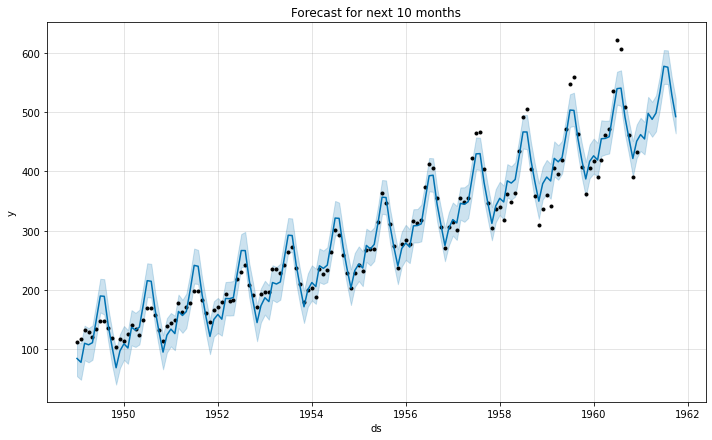

In [207]:
model.plot(forecast)
plt.title("Forecast for next 10 months")
plt.show()

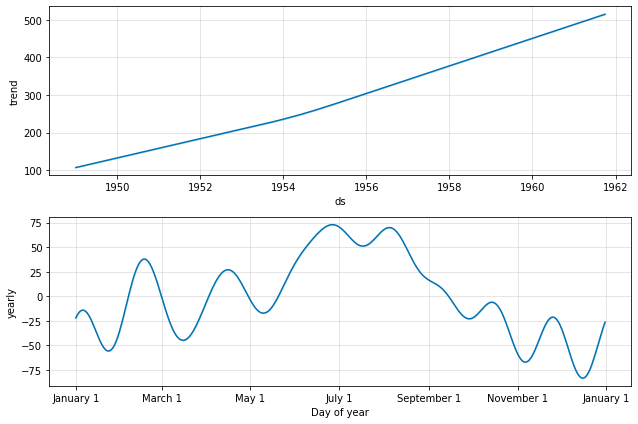

In [210]:
figure = model.plot_components(forecast)

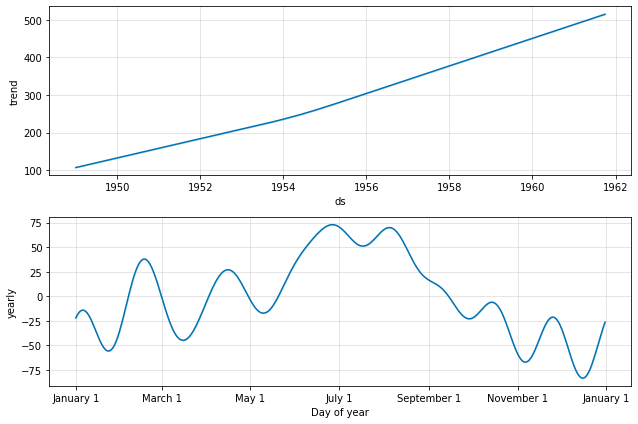

In [212]:
figure

In [213]:
from prophet.plot import plot_plotly, plot_components_plotly

In [214]:
plot_plotly(model, forecast)

In [215]:
plot_components_plotly(model, forecast)

In [216]:
help(Prophet) 

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniforml